In [5]:
# 분류, 회귀 => 자전거 대여량 예측(회귀)
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline 
#노트북 내에서 그래프 출력

In [6]:
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

In [7]:
train=pd.read_csv("train.csv", parse_dates=["datetime"])
train.shape

(10886, 12)

In [8]:
# 탐색적분석: 기술적 통계
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


In [9]:
train.head()
train.describe() #모든 컬럼에 대한 기술 정보
train.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [10]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

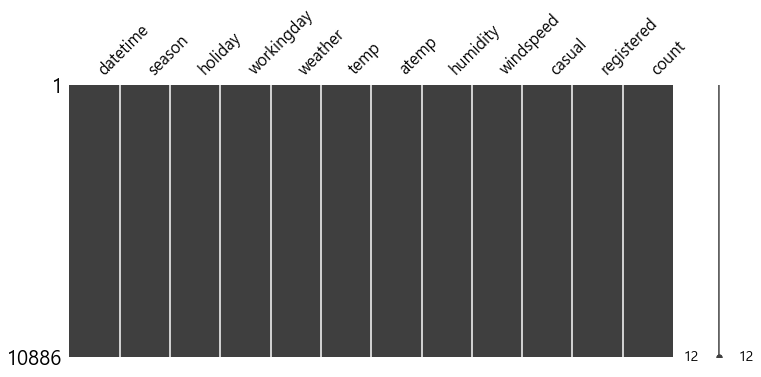

In [11]:
import missingno as msno
msno.matrix(train, figsize=(12,5))

In [12]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [13]:
train['year']=train['datetime'].dt.year
train['month']=train['datetime'].dt.month
train['day']=train['datetime'].dt.day
train['hour']=train['datetime'].dt.hour
train['minute']=train['datetime'].dt.minute
train['second']=train['datetime'].dt.second

In [14]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


[Text(0.5, 1.0, '시간별 대여량')]

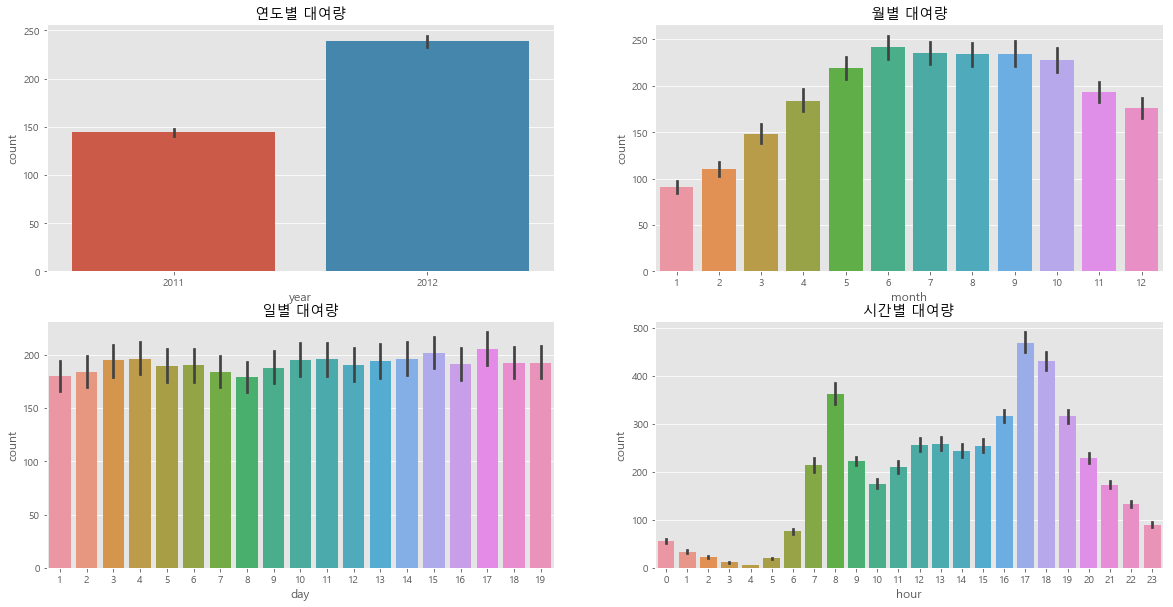

In [15]:
plt.style.use('ggplot')

figure, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
figure. set_size_inches(20,10)

sns.barplot(data=train, x='year', y='count', ax=ax1)
ax1.set(title='연도별 대여량')

sns.barplot(data=train, x='month', y='count', ax=ax2)
ax2.set(title='월별 대여량')

sns.barplot(data=train, x='day', y='count', ax=ax3)
ax3.set(title='일별 대여량')

sns.barplot(data=train, x='hour', y='count', ax=ax4)
ax4.set(title='시간별 대여량')

[Text(0.5, 1.0, '전체 대여량')]

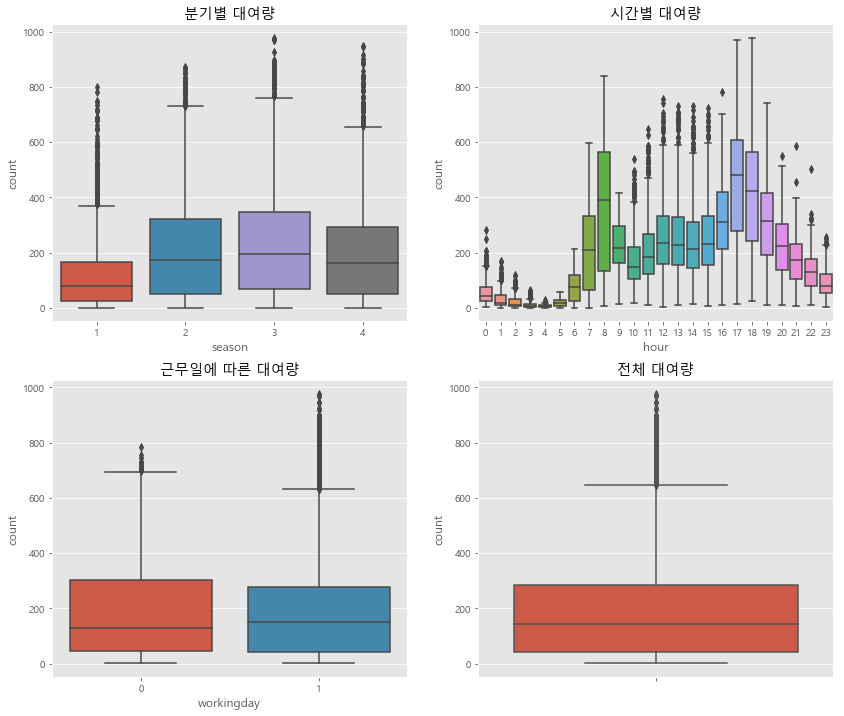

In [16]:
fig, axes = plt.subplots(2,2)
fig.set_size_inches(14,12)

sns.boxplot(data=train, x="season", y="count", ax=axes[0][0])
axes[0][0].set(title="분기별 대여량")

sns.boxplot(data=train, x="hour", y="count", ax=axes[0][1])
axes[0][1].set(title="시간별 대여량")

sns.boxplot(data=train, x="workingday", y="count", ax=axes[1][0])
axes[1][0].set(title="근무일에 따른 대여량")

sns.boxplot(data=train, y="count", ax=axes[1][1])
axes[1][1].set(title="전체 대여량")

In [17]:
# 요일별 대여량 
train['dayofweek']=train['datetime'].dt.dayofweek #0~6, 0:월...6:일
train['dayofweek'].value_counts() #값의 개수를 세는 함수


5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

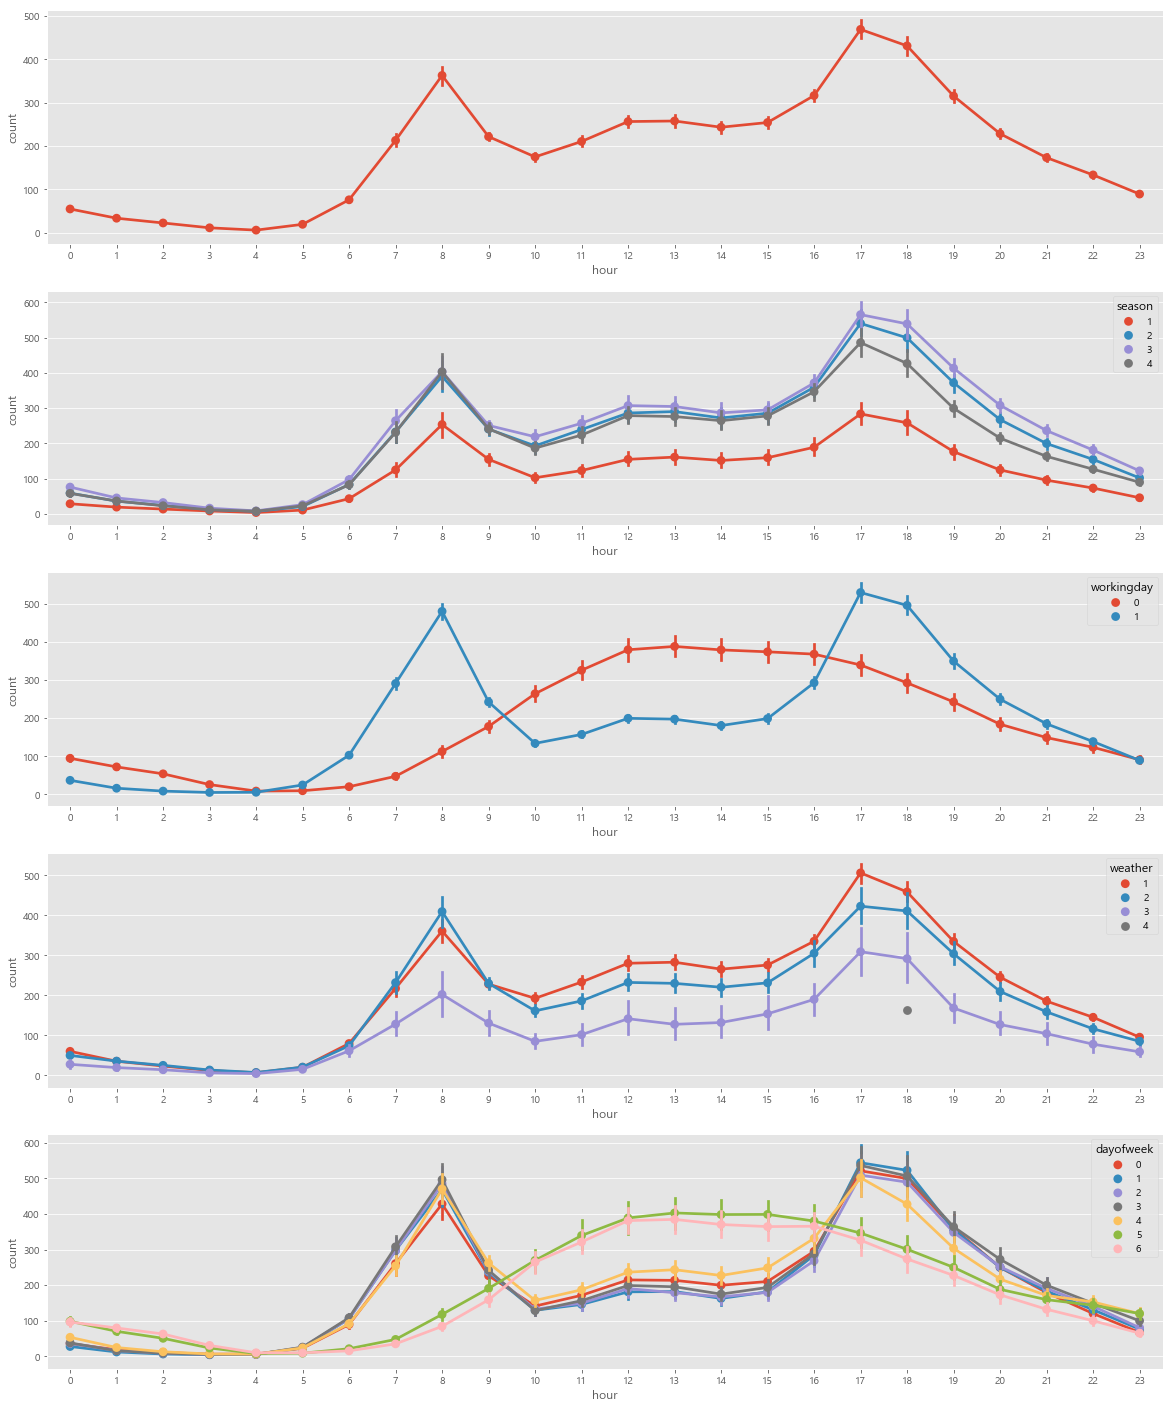

In [18]:
#시간대 별 대여량 시각화
fig, axes = plt.subplots(nrows=5)
fig.set_size_inches(20,25)

sns.pointplot(data=train, x='hour', y='count', ax=axes[0]) #각 시간대별 대여량
sns.pointplot(data=train, x='hour', y='count', hue="season", ax=axes[1]) #계절별(분기별) 대여량
sns.pointplot(data=train, x='hour', y='count', hue="workingday", ax=axes[2]) #근무일 여부에 따른 각 시간대별 대여량
sns.pointplot(data=train, x='hour', y='count', hue="weather", ax=axes[3]) #날씨에 따른 각 시간대별 대여량
sns.pointplot(data=train, x='hour', y='count', hue="dayofweek", ax=axes[4]) #요일에 따른 시간대별 대여량

In [19]:
# train.info()

corMat=train[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']]
corMat=corMat.corr() #상관계수
# corMat

m=np.array(corMat)
# print(m)
m[np.tril_indices_from(m)]=False #행번호 0~6, 열번호 0~6
m
# 0,0 0,1 0,2 0,3 ... 0,6
# 1,1 1,2 1,3 ... 1,6
# 5,5 5,6
# 6,6

array([[ 0.        ,  0.98494811, -0.06494877, -0.01785201,  0.46709706,
         0.31857128,  0.39445364],
       [ 0.        ,  0.        , -0.04353571, -0.057473  ,  0.46206654,
         0.31463539,  0.38978444],
       [ 0.        ,  0.        ,  0.        , -0.31860699, -0.3481869 ,
        -0.26545787, -0.31737148],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.09227619,
         0.09105166,  0.10136947],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.49724969,  0.69041357],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.97094811],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ]])

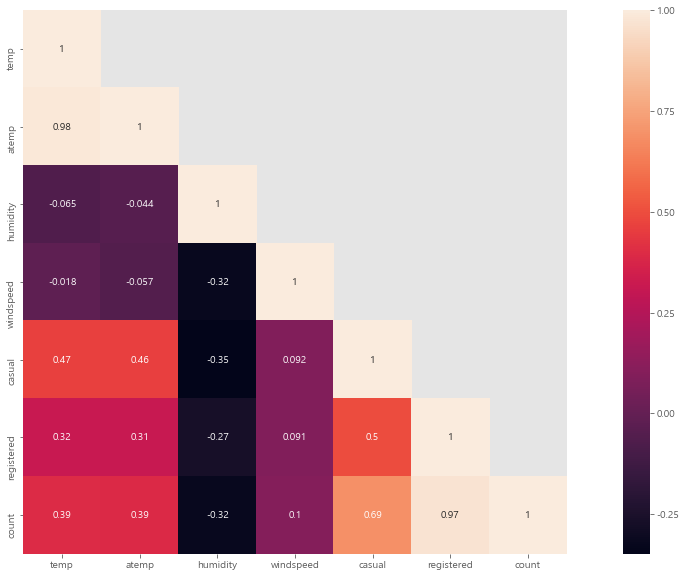

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corMat, mask=m, square=True, annot=True)

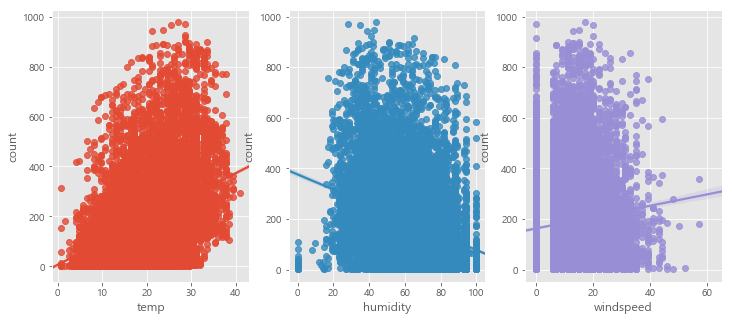

In [21]:
# 온도, 바람, 습도에 따른 자전거 대여량 시각화
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sns.regplot(x='temp', y='count', data=train, ax=ax1) # 그래프에 보이는 선: 회귀선
sns.regplot(x='humidity', y='count', data=train, ax=ax2)
sns.regplot(x='windspeed', y='count', data=train, ax=ax3)

In [22]:
# train['year_month']=train['datetime']
def con(dt):
    return "{0}-{1}".format(dt.year, dt.month)
train['year_month']=train['datetime'].apply(con)
type(train['year_month'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek,year_month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5,2011-1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5,2011-1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5,2011-1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5,2011-1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5,2011-1


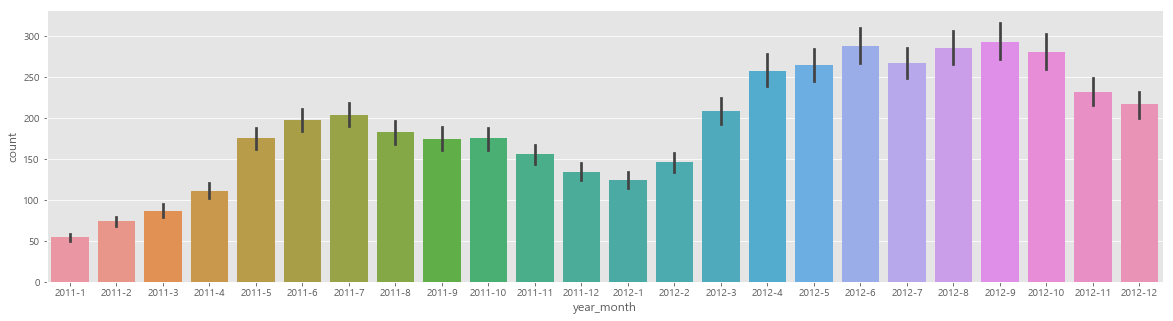

In [23]:
# year_month를 기준으로 count에 대한 값을 barplot형태로 출력
fig, ax = plt.subplots()
fig.set_size_inches(20,5)
sns.barplot(data=train, x='year_month', y='count', ax=ax)

In [24]:
# 이상치 제거(각 값 - 평균값의 결과가 단순히 표준편차의 3배를 넘어가면 이상치로 간주하자)
# count열에 대해 평균값을 뺀 값이...
# 표준편차*3 보다 작거나 같은 값들에 대해서만 필터링
normalData=train[np.abs(train['count']-train['count'].mean()) <= 3*train['count'].std()] # count의 표준편차*3배
print(train.shape)
print(normalData.shape)

(10886, 20)
(10739, 20)


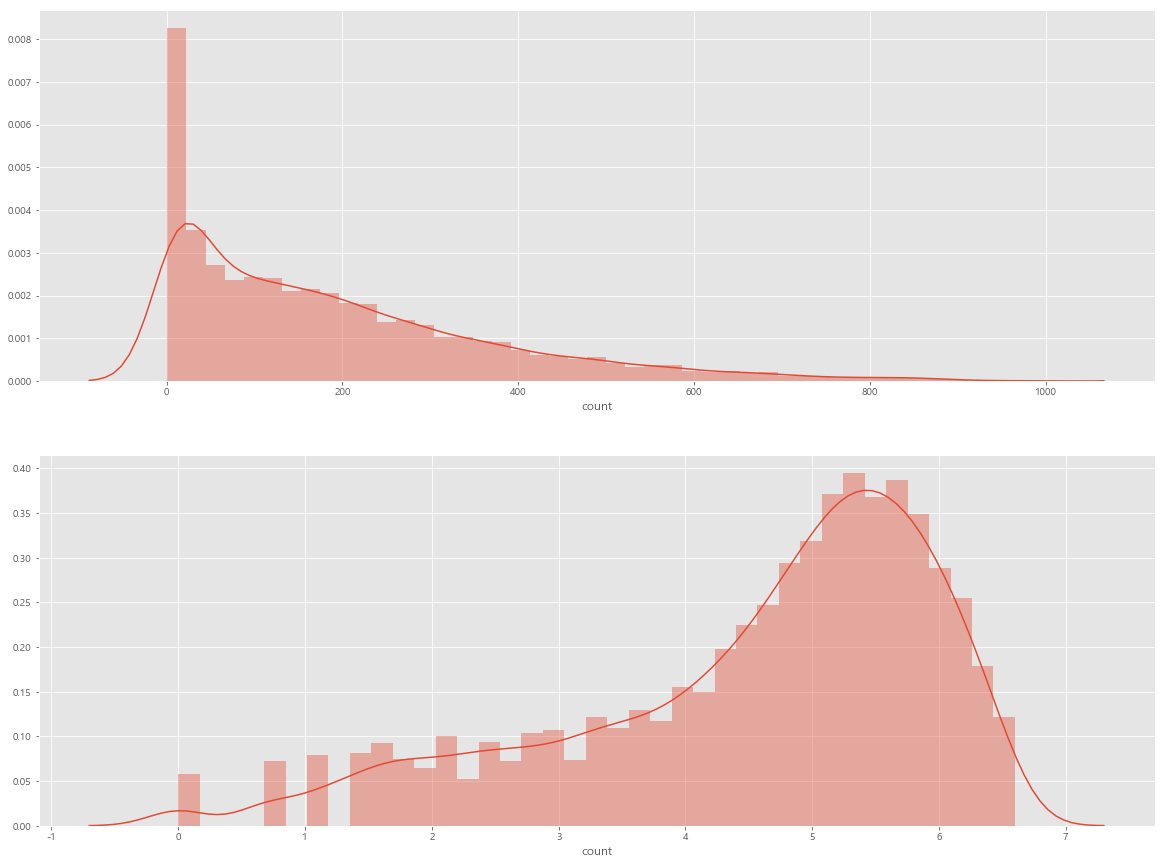

In [25]:
#count값에 따른 데이터 분포도 출력
fig, axes = plt.subplots(2)
fig.set_size_inches(20, 15)
sns.distplot(train['count'],ax=axes[0])
sns.distplot(np.log(normalData['count']),ax=axes[1])

mpl.rcParams['axes.unicode_minus']=False #그래프에서 -폰트 깨지는 문제 해결

import warnings 
warnings.filterwarnings('ignore') #warning 무시

In [26]:
#2.특성공학 -> 모델 생성
train=pd.read_csv('train.csv', parse_dates=['datetime'])
train.shape #(10886, 12)

test=pd.read_csv('test.csv', parse_dates=['datetime'])
test.shape #(6493, 9)

(6493, 9)

In [27]:
train['year']=train['datetime'].dt.year
train['month']=train['datetime'].dt.month
train['day']=train['datetime'].dt.day
train['hour']=train['datetime'].dt.hour
train['minute']=train['datetime'].dt.minute
train['second']=train['datetime'].dt.second
train['dayofweek']=train['datetime'].dt.dayofweek

test['year']=test['datetime'].dt.year
test['month']=test['datetime'].dt.month
test['day']=test['datetime'].dt.day
test['hour']=test['datetime'].dt.hour
test['minute']=test['datetime'].dt.minute
test['second']=test['datetime'].dt.second
test['dayofweek']=test['datetime'].dt.dayofweek

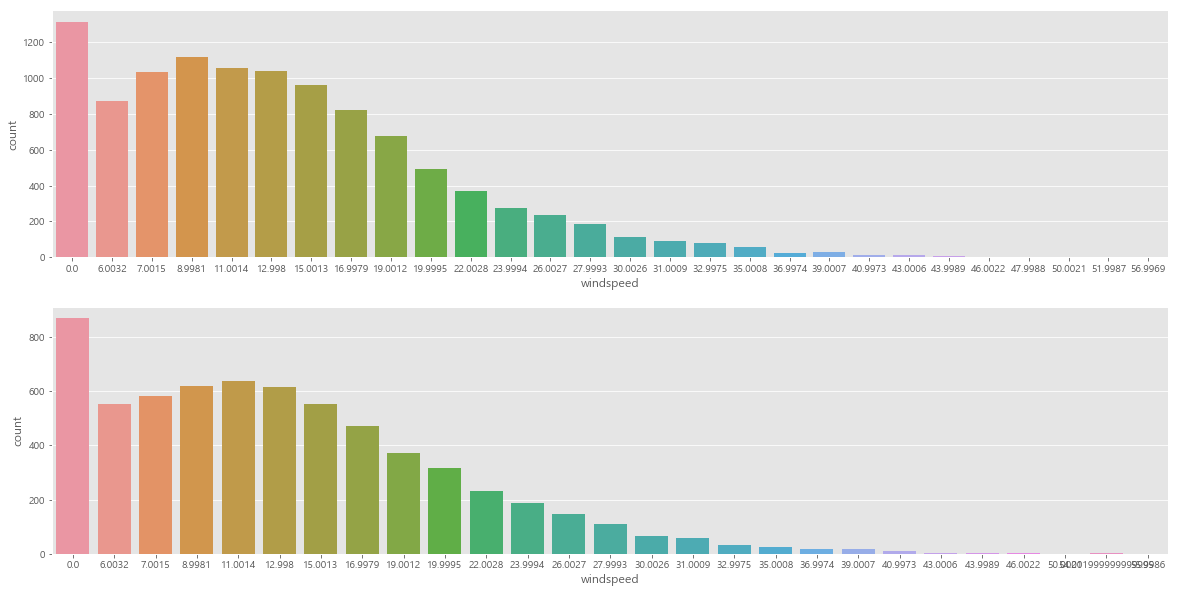

In [28]:
#풍속 0 => 대체(평균, 중앙값, .... , 리그레션, knn)
fig, axes = plt.subplots(2)
fig.set_size_inches(20,10)
sns.countplot(data=train, x="windspeed", ax=axes[0])
sns.countplot(data=test, x="windspeed", ax=axes[1])

In [29]:
# 풍속이 0인 값을 평균값으로 일괄 대체
# train.loc[train['windspeed']==0, 'windspeed']= train['windspeed'].mean()
# test.loc[test['windspeed']==0, 'windspeed']= test['windspeed'].mean()

# train['windspeed'].mean()
# test['windspeed'].mean()

In [30]:
#2. 머신러닝 -> 예측
trainWind0=train.loc[train['windspeed']==0]
trainWindNot0=train.loc[train['windspeed']!=0]
trainWind0.shape #(1313, 19)
trainWindNot0.shape #(9573, 19)

(9573, 19)

C:\Users\B-7\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


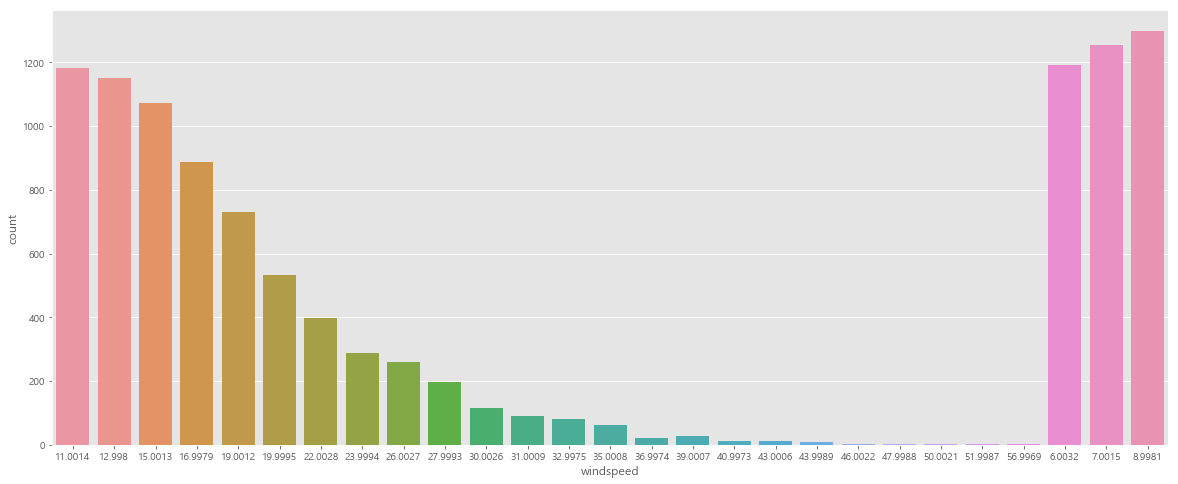

In [31]:
#랜덤포레스트 분류기로 분류, 0인 풍속에 대한 적정 값을 예측
from sklearn.ensemble import RandomForestClassifier

def predict_ws(data): 
    # 풍속을 0인것과 아닌것으로 구분
    dataWind0=data[data['windspeed']==0]
    dataWindNot0=data[data['windspeed']!=0]
    
    # 변수들 -> 풍속 예측
    xdata=['season', 'weather', 'humidity', 'month', 'temp', 'year']
    dataWindNot0['windspeed']=dataWindNot0['windspeed'].astype('str') # 밑에 두번째 들어가야 하는게 글자형으로 들어가야 함
    
    #랜덤포레스트 분류기
    rfm_wind=RandomForestClassifier()
    rfm_wind.fit(dataWindNot0[xdata],  dataWindNot0['windspeed']) 
    wind0Values=rfm_wind.predict(dataWind0[xdata])
    
    preWind0=dataWind0
    preWindNot0=dataWindNot0
    
    preWind0['windspeed']=wind0Values
    data=preWindNot0.append(preWind0)
    return data
    
train=predict_ws(train)
train


fig, axes = plt.subplots()
fig.set_size_inches(20,8)
sns.countplot(data=train, x='windspeed', ax=axes)


In [32]:
#feature 선택
train.info()
cfn=["season", "holiday", "workingday", "weather", "dayofweek", "month", "year", "hour"]
for v in cfn:
    train[v]=train[v].astype('category')
    test[v]=test[v].astype('category')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 5 to 10862
Data columns (total 19 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null object
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
year          10886 non-null int64
month         10886 non-null int64
day           10886 non-null int64
hour          10886 non-null int64
minute        10886 non-null int64
second        10886 non-null int64
dayofweek     10886 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(15), object(1)
memory usage: 2.0+ MB


In [33]:
fn=["temp", "atemp", "humidity", "windspeed", "season", "holiday", "workingday", "weather", "dayofweek", "month", "year", "hour"]
xtrain=train[fn]
xtest=test[fn]

In [34]:
xtrain.shape #(10886, 12)
xtest.shape #(6493, 12)

(6493, 12)

In [35]:
ytrain=train['count']
ytrain.shape

(10886,)

In [36]:
#캐글에서 점수구할때 사용함

from sklearn.metrics import make_scorer
def rmsle(pre_val, act_val):
    #넘파이 배열로 생성
    preval=np.array(pre_val)
    actval=np.array(act_val)
    
    #예측값과 실제값에 1을 더함. 로그 취함
    logpre=np.log(preval+1)
    logact=np.log(actval+1)
    
    diff=logpre-logact
    diff=np.square(diff)
    diff=diff.mean()
    
    score=np.sqrt(diff)
    
    return score
rmsle_scorer=make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

In [37]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold=KFold(n_splits=10, shuffle=True, random_state=42) 
# kFold 사용할 때 반드시 셔플과 함께 씀

In [38]:
k_fold

KFold(n_splits=10, random_state=42, shuffle=True)

In [39]:
from sklearn.ensemble import RandomForestRegressor
#n_estimator:포레스트를 구성할 tree 개수
model=RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [40]:
%time score=cross_val_score(model, xtrain, ytrain, cv=k_fold, scoring=rmsle_scorer)
score=score.mean()


Wall time: 9.7 s


In [41]:
print(score)

0.32427587787401874


In [42]:
model.fit(xtrain,ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [43]:
predictions = model.predict(xtest)
print(predictions.shape)
predictions[0:10]

(6493,)


array([ 11.01,   5.71,   3.54,   3.56,   3.02,   5.47,  34.88,  94.16,
       202.28, 118.48])

In [44]:
submission=pd.read_csv("sampleSubmission.csv")
submission['count']=predictions
submission
submission.to_csv("mysubmission.csv", index=False)

In [45]:
import tensorflow as tf

In [107]:
# 선형 회귀 모델 작성
import numpy as np 
num_points = 200 #data 개수
vectors_set = []
for i in range(num_points):
    x=np.random.normal(5,5)+15 #평균20, 표준편차5인 난수 생성
    y=x*1000+(np.random.normal(0,3))*1000
    vectors_set.append([x,y])
xdata=[v[0] for v in vectors_set]
ydata=[v[1] for v in vectors_set]

In [108]:
ydata

[19597.853405150036,
 22594.035479357888,
 19519.85635330757,
 22397.239636925566,
 18105.620278423747,
 19846.571868171497,
 33613.85758405328,
 14552.97681696363,
 28655.043305966974,
 28994.092264556653,
 12066.716913459728,
 23353.990039795877,
 12960.208139348731,
 26694.631986252865,
 14503.849539107248,
 29218.988350437292,
 15943.333810115899,
 16241.97120612561,
 15574.882748518286,
 22263.36191209689,
 20855.11145845871,
 18013.214347167766,
 24938.61915584522,
 18627.34912465091,
 16002.399253782602,
 6210.521461948536,
 19845.877587136394,
 18057.549120072425,
 19435.87780122949,
 24492.396429778255,
 27048.21311038406,
 23032.72623286436,
 20295.83741148673,
 21978.573174575686,
 7794.870431824426,
 13402.411547185635,
 19146.145823972307,
 25946.07427465098,
 18672.640037247853,
 16814.84045670992,
 11958.758888345634,
 21611.607049711485,
 28955.15510670204,
 22889.804085177257,
 16721.585511392404,
 16821.26353312535,
 23799.733362245566,
 21719.82430481585,
 17187.9136

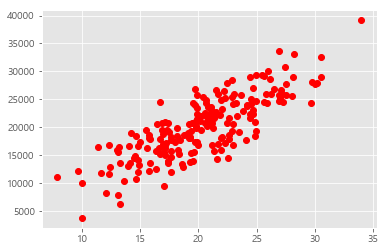

In [109]:
plt.plot(xdata, ydata, 'ro')

In [119]:
# 텐서플로우를 사용하여 회귀 모델 생성
# 모델가정 : H(x)=Wx + b (직선, 일차방정식)
W=tf.Variable(tf.random_uniform([1], -1.0, 1.0))
# 텐서플로우는 세션을 실행시킴으로서 수행됨
b=tf.Variable(tf.zeros([1]))
y=W*xdata+b

In [120]:
W #변수/노드
b #변수/노드
y #노드

<tf.Tensor 'add_7:0' shape=(200,) dtype=float32>

In [121]:
# 항상 정해져서 안바뀜
# dataset: xdata, ydata
cost=tf.reduce_mean(tf.square(y-ydata))
optimizer=tf.train.GradientDescentOptimizer(0.0015)
train=optimizer.minimize(cost)

In [122]:
init=tf.initialize_all_variables()

In [123]:
sess=tf.Session()
sess.run(init) #세션 객체로 노드를 실행

No handles with labels found to put in legend.


0 [1291.8882] [60.489365]
0 50057204.0


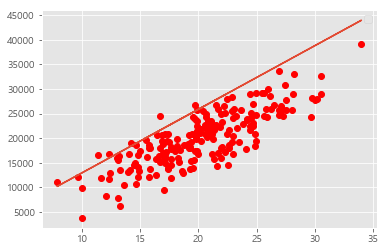

In [124]:
# sess.run(train)
# print(step, sess.run(W), sess.run(b))
# print(step, sess.run(cost))
# plt.plot(xdata, ydata, 'ro')
# plt.plot(xdata, sess.run(W)*xdata+sess.run(b))
for step in range(1):
    sess.run(train)
    print(step, sess.run(W), sess.run(b))
    print(step, sess.run(cost))
    plt.plot(xdata, ydata, 'ro')
    plt.plot(xdata, sess.run(W)*xdata+sess.run(b))
    plt.legend()
    plt.show()